# Which Alliances Win?

In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
import json
import time
from glob import glob
import ast
from collections import Counter

In [2]:
#list of years (one folder per year)
years = glob('./data/events/*')

#list of events (the event folders are inside those year folders)
events = [glob(x+'/*') for x in years]

In [3]:
#reduce events list to 1D for easier iteration
eventlist = []
for i in range(len(events)):
    eventlist.extend(events[i])

In [4]:
#make an array of the awards and alliances data for all events
eventResults = []

for folder in eventlist:

    file = glob(folder+'/'+folder[18:]+'_alliances*')
    if len(file) == 0:
        continue
    with open(file[0],"r",encoding='utf8') as f:
        alliances = f.readlines()
        alliances = ast.literal_eval(alliances[0])

    file = glob(folder+'/'+folder[18:]+'_awards*')[-1]
    if len(file) == 0:
        continue
    with open(file,"r",encoding='utf8') as f:
        awards = f.readlines()
        awards = ast.literal_eval(awards[0])

    
    if len(awards) == 0 or len(alliances) == 0:
        continue
    
    eventResults.append([awards, alliances])
    

In [5]:
#use the award and allainces data to lookup the winning alliance rank
winningalliance = []

for e in range(len(eventResults)):
    for i in range(len(eventResults[e][0])):
        
        #awardtype=1 is the event winning alliance
        if eventResults[e][0][i]['award_type'] == 1:
            team = eventResults[e][0][i]['recipient_list'][0]['team_number']
            continue
            
    for i in range(len(eventResults[e][1])):
        if ('frc'+str(team)) in eventResults[e][1][i]['picks']:
            winningalliance.append(i+1)
            continue
            
        

In [6]:
#use counter to count the number of each alliance
c = Counter(winningalliance)
#based on subject knowledge, i know that the frequencies will 
#always get sorted in order
output = c.most_common(8)

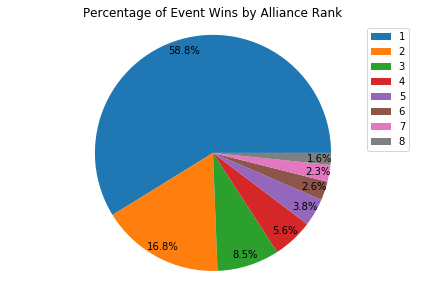

In [7]:
#plot the data in a pie chart
alliance = [i[0] for i in output]
wins = [i[1] for i in output]
pie = plt.pie(wins, autopct='%1.1f%%', pctdistance=.9, labeldistance=1)
plt.legend(pie[0], alliance, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Event Wins by Alliance Rank')

plt.show()